# concept of outlier

## Outlier :- 
    An outlier in data analysis refers to a data point or observation that significantly differs from other observations in a dataset. 


## reason:-
    Outliers can occur due to various reasons such as measurement errors, 
    experimental variability, or genuine anomalies in the data.

# detecting and handling the outliers:-

## using IQR(inter_quartile_range)

### step 1:- loading the necessary pandas libraries:-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### step 2:- load a data

We are going to load a dataset from the seaborn package as it contains few in built dataset for practice.

In [5]:
sb.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

There are 88 in-built dataset present in seaborn library.

We are selecting "car_crashes" dataset for our practice.

In [7]:
#loading the dataset
data=sb.load_dataset("car_crashes")

In [8]:
data

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


In [9]:
# checking the info and statistical calculations.
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [11]:
# statistical calculation
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total,51.0,15.790196,4.122002,5.900,12.7500,15.600,18.500,23.900
speeding,51.0,4.998196,2.017747,1.792,3.7665,4.608,6.439,9.450
alcohol,51.0,4.886784,1.729133,1.593,3.8940,4.554,5.604,10.038
not_distracted,51.0,13.573176,4.508977,1.760,10.4780,13.857,16.140,23.661
no_previous,51.0,14.004882,3.764672,5.900,11.3480,13.775,16.755,21.280
ins_premium,51.0,886.957647,178.296285,641.960,768.4300,858.970,1007.945,1301.520
ins_losses,51.0,134.493137,24.835922,82.750,114.6450,136.050,151.870,194.780


### step 3:- Now checking for outlier in dataset by plotting the boxplot .

<Axes: xlabel='ins_losses'>

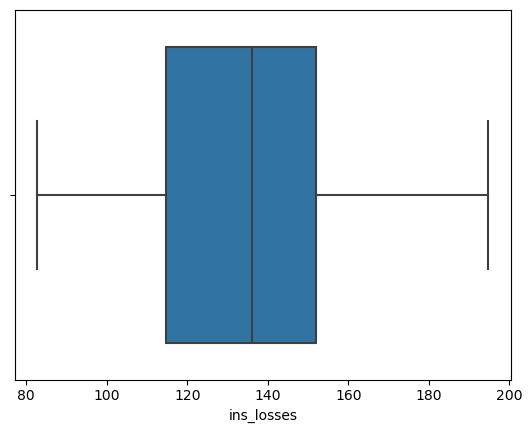

In [21]:
sb.boxplot(x=data["ins_losses"])

<Axes: xlabel='ins_premium'>

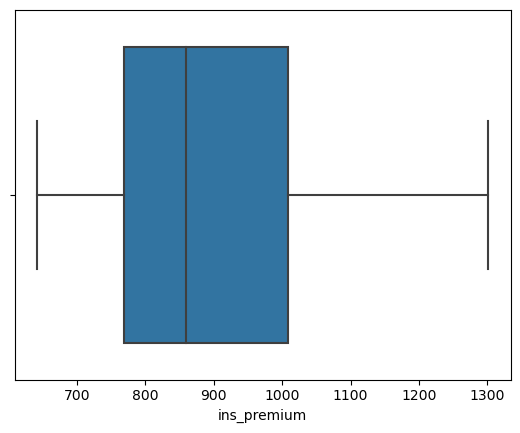

In [24]:
sb.boxplot(x=data['ins_premium'])

<Axes: >

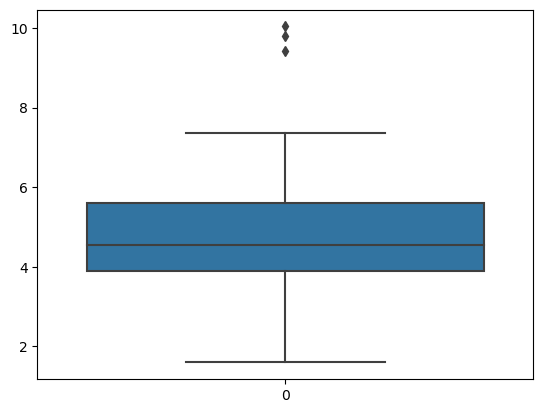

In [25]:
sb.boxplot(data["alcohol"])

### We got a column with outlier in it.

### step-4 :- using IQR to detect the outlier

In [27]:
#step-1: calculating the range for Q1 as 25% of data , Q3 as 75% of data.

    
Q1=data["alcohol"].quantile(0.25)
Q3=data["alcohol"].quantile(0.75)

# step-2 : calculating the IQR 
IQR=Q3-Q1

# step-3: with the help of IQR ,we will set the boundary of data as upperboundary and lowerboundary.
lowerboundary=Q1-1.5*(IQR)

upperboundary=Q3+1.5*(IQR)

In [28]:
# checking the boundaries
print(f"lowerlimit={lowerboundary}")

print(f"upperlimit={upperboundary}")


lowerlimit=1.3290000000000015
upperlimit=8.168999999999997


### outlier detecting and outliers(removing)

In [35]:
# If the data point which are above upperlimit and below the lowerlimit will be our outliers.
outlier_detect=data[(data["alcohol"]<lowerboundary) | (data["alcohol"]>upperboundary)]

In [36]:
# displaying the outlier points from column "alcohol"
outlier_detect

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC


 * There are 3 outlier present in our column "alcohol",as seen in above box plot also.

### As there are less outlier in our columns so we are removing it.

In [39]:
# created outlier_removed variable to stored the data without outlier.

outlier_removed=data[(data["alcohol"]>lowerboundary) & (data["alcohol"]<upperboundary)]

In [40]:
outlier_removed

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


<Axes: xlabel='alcohol'>

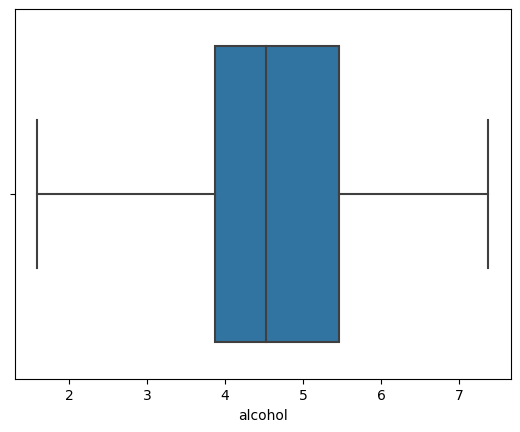

In [42]:
# plotting the box plot for visuals
sb.boxplot(x=outlier_removed['alcohol'])

* Successfully removed the outlier from the "alcohol" column.